In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

# set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor
import os

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [61]:
insurance_train = pd.read_csv("/content/gdrive/MyDrive/Kaggle_30day_competition/train.csv")
insurance_test = pd.read_csv("/content/gdrive/MyDrive/Kaggle_30day_competition/test.csv")

In [28]:
display(insurance_test.shape)
display(insurance_train.shape)

(200000, 25)

(300000, 26)

In [8]:
display(insurance_test.head(3))
display(insurance_train.head(3))

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,I,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,H,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,K,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351


In [9]:
insurance_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [10]:
insurance_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

In [11]:
display(insurance_test.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,249970.884580,0.526858,0.460882,0.491686,0.496263,0.492200,0.509944,0.468050,0.537617,0.497587,0.474630,0.473625,0.473589,0.492756,0.508303
std,144169.245904,0.230506,0.213896,0.252852,0.219304,0.240251,0.228100,0.210167,0.218197,0.239337,0.217558,0.255307,0.221844,0.247105,0.222977
min,0.000000,-0.117993,-0.069316,-0.056095,0.130655,0.255903,0.045921,-0.224613,0.203763,-0.260236,0.117894,0.048734,0.052615,-0.074201,0.151052
25%,125316.750000,0.405787,0.310536,0.302189,0.328865,0.284188,0.353682,0.342813,0.356482,0.332762,0.306940,0.274991,0.308495,0.288094,0.300697
50%,249997.000000,0.496602,0.427656,0.503075,0.464590,0.395080,0.488378,0.429819,0.505216,0.438716,0.434610,0.460042,0.433857,0.422065,0.472446
75%,374649.750000,0.666389,0.615041,0.648234,0.663401,0.697252,0.668586,0.573861,0.703289,0.605368,0.610768,0.690143,0.642201,0.711038,0.758496
85%,424559.150000,0.769067,0.717682,0.743649,0.761562,0.803682,0.763463,0.675980,0.841379,0.769826,0.787220,0.752666,0.727819,0.777206,0.806262
95%,474938.050000,0.990518,0.836851,0.963961,0.917240,0.968945,0.936498,0.882322,0.897733,0.998718,0.846048,0.889436,0.867349,0.886160,0.861993
99%,494859.030000,1.033977,0.884519,1.026281,1.019281,1.029777,1.053258,1.042042,1.016557,1.031262,0.944898,0.989541,1.023181,0.970020,0.871330


In [12]:
insurance_train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [13]:
insurance_test.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,249970.884580,0.526858,0.460882,0.491686,0.496263,0.492200,0.509944,0.468050,0.537617,0.497587,0.474630,0.473625,0.473589,0.492756,0.508303
std,144169.245904,0.230506,0.213896,0.252852,0.219304,0.240251,0.228100,0.210167,0.218197,0.239337,0.217558,0.255307,0.221844,0.247105,0.222977
min,0.000000,-0.117993,-0.069316,-0.056095,0.130655,0.255903,0.045921,-0.224613,0.203763,-0.260236,0.117894,0.048734,0.052615,-0.074201,0.151052
25%,125316.750000,0.405787,0.310536,0.302189,0.328865,0.284188,0.353682,0.342813,0.356482,0.332762,0.306940,0.274991,0.308495,0.288094,0.300697
50%,249997.000000,0.496602,0.427656,0.503075,0.464590,0.395080,0.488378,0.429819,0.505216,0.438716,0.434610,0.460042,0.433857,0.422065,0.472446
75%,374649.750000,0.666389,0.615041,0.648234,0.663401,0.697252,0.668586,0.573861,0.703289,0.605368,0.610768,0.690143,0.642201,0.711038,0.758496
max,499995.000000,1.058434,0.887253,1.034687,1.039558,1.055423,1.067641,1.111540,1.032823,1.040208,0.982928,1.055955,1.071445,0.975032,0.906013


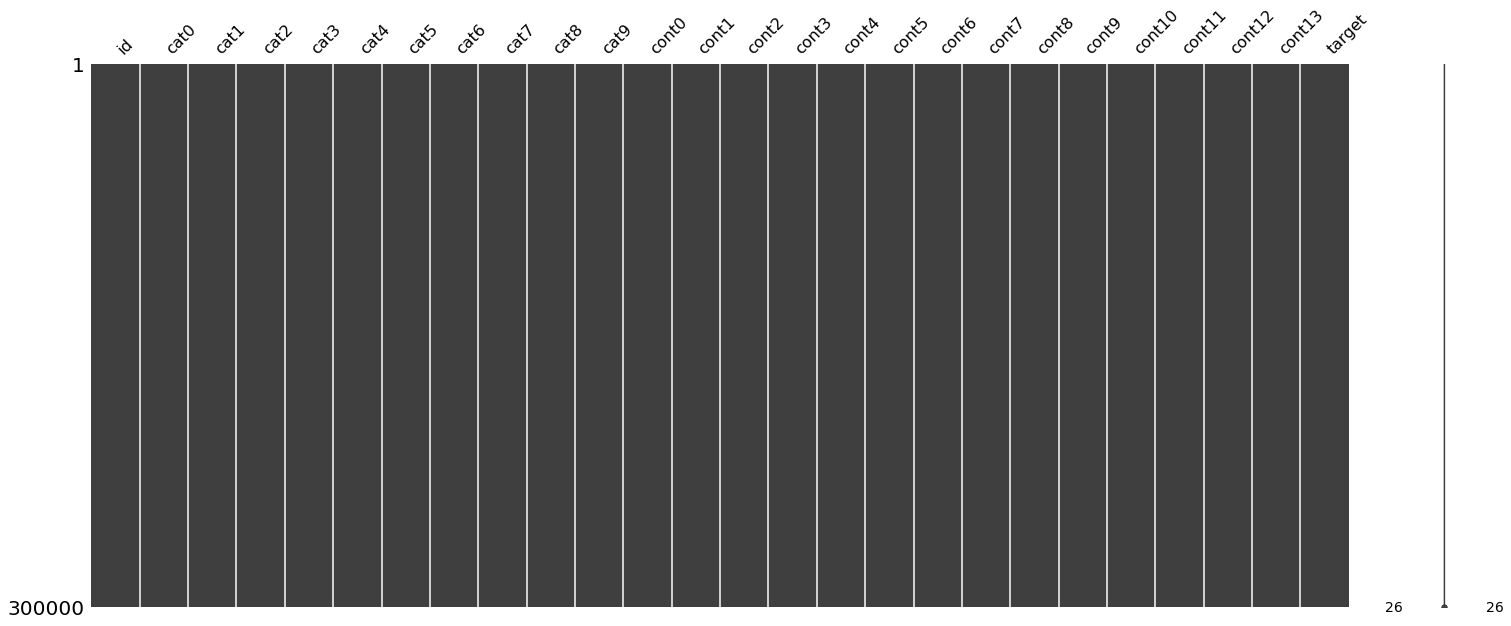

In [ ]:
train_nan = msno.matrix(insurance_train)

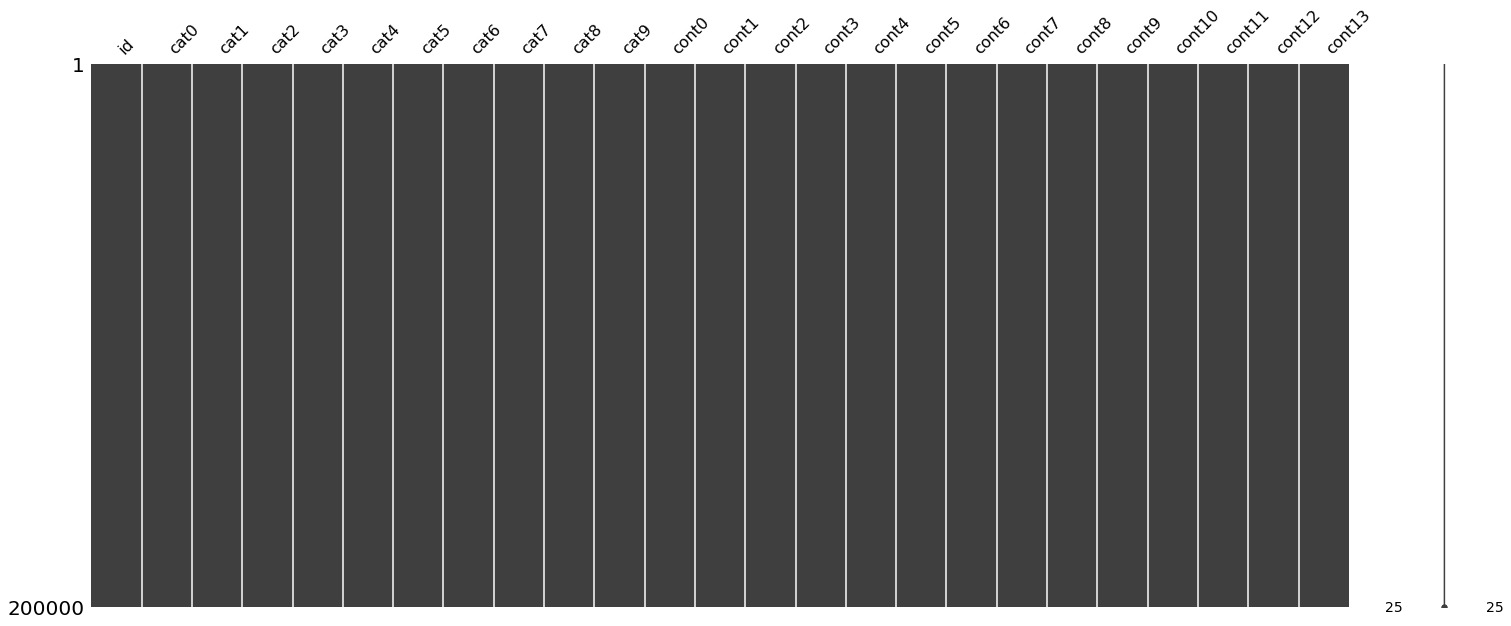

In [ ]:
test_nan = msno.matrix(insurance_test)

In [14]:
insurance_train.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

In [29]:
X = insurance_train.drop(['id', 'target'], axis=1)
y = insurance_train['target']

In [30]:
display(X.head(3))
print("\n")
display(y.head(3))

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846


0    8.113634
1    8.481233
2    8.364351
Name: target, dtype: float64

In [17]:
display(X.shape)
display(y.shape)

(300000, 25)

(300000,)

### train_test split

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=1)

In [32]:
display(X.columns)
display(insurance_train.columns)

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

In [33]:
X_train.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

In [34]:
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

In [35]:
# copy to avoid changing original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each categorical column
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

In [36]:
display(label_X_train.head(3))
display(X_train.head(3))
display(label_X_valid.head(3))

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
178796,0.0,0.0,0.0,2.0,1.0,1.0,0.0,4.0,2.0,1.0,0.558652,0.364985,0.953177,0.261481,0.285042,0.366598,0.552537,0.242170,0.427087,0.413445,0.110874,0.092652,0.168542,0.276961
179767,0.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,10.0,0.542071,0.309224,0.736795,0.455526,0.475618,0.386943,0.334639,0.256481,0.441711,0.423982,0.490387,0.996827,0.422264,0.161990
85236,0.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,8.0,0.398638,0.619891,1.003411,0.543077,0.458128,0.361442,-0.179812,0.649192,0.408889,0.282222,0.298973,0.493494,0.169332,0.256212


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
178796,A,A,A,C,B,B,A,E,C,B,0.558652,0.364985,0.953177,0.261481,0.285042,0.366598,0.552537,0.242170,0.427087,0.413445,0.110874,0.092652,0.168542,0.276961
179767,A,B,B,C,B,B,A,E,C,K,0.542071,0.309224,0.736795,0.455526,0.475618,0.386943,0.334639,0.256481,0.441711,0.423982,0.490387,0.996827,0.422264,0.161990
85236,A,B,A,C,B,D,A,E,C,I,0.398638,0.619891,1.003411,0.543077,0.458128,0.361442,-0.179812,0.649192,0.408889,0.282222,0.298973,0.493494,0.169332,0.256212


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
205179,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,4.0,8.0,0.578490,0.066356,1.014283,0.466432,0.309044,0.09832,0.200519,0.443413,0.259345,0.486813,0.251615,0.101275,0.175805,0.816855
101710,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,14.0,0.435555,0.886870,0.001745,0.472420,0.873128,0.83302,0.427276,0.928910,0.615088,0.530460,0.681899,1.027982,0.397732,0.260591
89106,0.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,4.0,5.0,0.529012,0.364516,0.666082,0.570136,0.879737,0.41986,0.440994,0.338174,-0.243687,0.469828,0.231568,0.339559,0.424826,0.448875


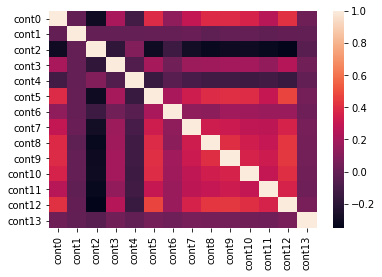

In [37]:
sns.heatmap(X_train.corr())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

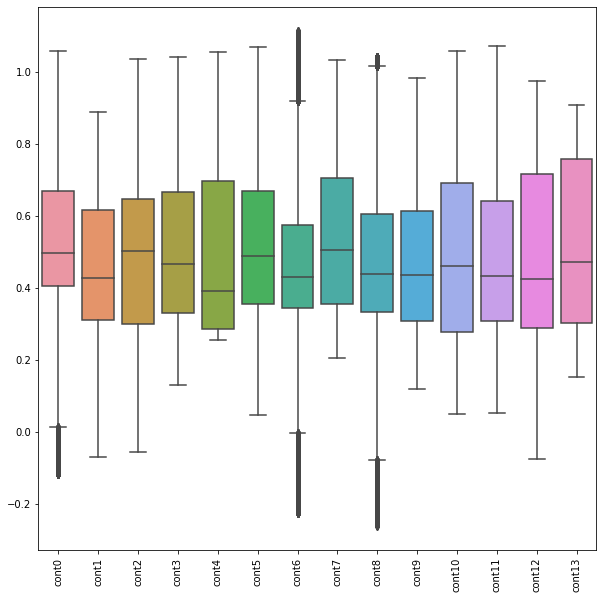

In [39]:
# check the outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)

In [40]:
label_X_train.head(3)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
178796,0.0,0.0,0.0,2.0,1.0,1.0,0.0,4.0,2.0,1.0,0.558652,0.364985,0.953177,0.261481,0.285042,0.366598,0.552537,0.242170,0.427087,0.413445,0.110874,0.092652,0.168542,0.276961
179767,0.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,10.0,0.542071,0.309224,0.736795,0.455526,0.475618,0.386943,0.334639,0.256481,0.441711,0.423982,0.490387,0.996827,0.422264,0.161990
85236,0.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,8.0,0.398638,0.619891,1.003411,0.543077,0.458128,0.361442,-0.179812,0.649192,0.408889,0.282222,0.298973,0.493494,0.169332,0.256212



## define pipeline


In [78]:
categorical_cols = [colname for colname in X_train.columns if X_train[colname].nunique() < 10 and 
                        X_train[colname].dtype == "object"]

numerical_cols = [colname for colname in X_train.columns if X_train[colname].dtype in ['int64', 'float64']]

my_cols = categorical_cols + numerical_cols

X_trainB = X_train[my_cols].copy()
X_validB = X_valid[my_cols].copy()

numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal encoder', OrdinalEncoder())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
model =  XGBRegressor(n_estimators=100, learning_rate=0.01, objective ='reg:squarederror', random_state=0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

preprocessor.fit(X_validB)
X_valid_transformed = preprocessor.transform(X_validB)



pipeline.fit(X_trainB, y_train, 
                model__early_stopping_rounds=20, 
                model__eval_set=[(X_valid_transformed, y_valid)], #once reasy for model uncomment the code
                model__verbose=False)                            

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'c

In [79]:
predictions = pipeline.predict(X_validB)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 2.8326842183118734


call pipeline - CV _predict

In [64]:
validation_result = cross_val_score(pipeline, X, y, cv=3)

In [66]:
validation_result

array([-14.35438818, -14.44522313, -14.38914   ])

In [86]:
full_train = pd.concat((X_trainB, X_validB), axis=0)

display(full_train.head(3))
display(full_train.tail(3))
display(X_trainB.head(3))
display(X_validB.tail(3))

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
178796,A,A,A,C,B,B,A,E,C,0.558652,0.364985,0.953177,0.261481,0.285042,0.366598,0.552537,0.242170,0.427087,0.413445,0.110874,0.092652,0.168542,0.276961
179767,A,B,B,C,B,B,A,E,C,0.542071,0.309224,0.736795,0.455526,0.475618,0.386943,0.334639,0.256481,0.441711,0.423982,0.490387,0.996827,0.422264,0.161990
85236,A,B,A,C,B,D,A,E,C,0.398638,0.619891,1.003411,0.543077,0.458128,0.361442,-0.179812,0.649192,0.408889,0.282222,0.298973,0.493494,0.169332,0.256212


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
242397,A,B,A,C,B,B,A,E,E,0.240685,0.306391,0.507867,0.198866,0.936272,0.463663,0.593703,0.533412,0.584017,0.545984,0.399870,0.332196,0.605029,0.642419
221809,A,B,A,C,B,B,A,E,C,0.280571,0.132268,0.501666,0.326299,1.030826,0.047878,0.217963,0.535348,0.517317,0.444485,0.322862,0.443759,0.193661,0.852312
197930,A,B,A,C,B,B,A,E,C,0.319221,0.095179,1.020984,0.161550,0.512399,0.336256,0.449380,0.221349,0.257561,0.334697,0.241046,0.305232,0.273682,0.282639


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
178796,A,A,A,C,B,B,A,E,C,0.558652,0.364985,0.953177,0.261481,0.285042,0.366598,0.552537,0.242170,0.427087,0.413445,0.110874,0.092652,0.168542,0.276961
179767,A,B,B,C,B,B,A,E,C,0.542071,0.309224,0.736795,0.455526,0.475618,0.386943,0.334639,0.256481,0.441711,0.423982,0.490387,0.996827,0.422264,0.161990
85236,A,B,A,C,B,D,A,E,C,0.398638,0.619891,1.003411,0.543077,0.458128,0.361442,-0.179812,0.649192,0.408889,0.282222,0.298973,0.493494,0.169332,0.256212


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
242397,A,B,A,C,B,B,A,E,E,0.240685,0.306391,0.507867,0.198866,0.936272,0.463663,0.593703,0.533412,0.584017,0.545984,0.399870,0.332196,0.605029,0.642419
221809,A,B,A,C,B,B,A,E,C,0.280571,0.132268,0.501666,0.326299,1.030826,0.047878,0.217963,0.535348,0.517317,0.444485,0.322862,0.443759,0.193661,0.852312
197930,A,B,A,C,B,B,A,E,C,0.319221,0.095179,1.020984,0.161550,0.512399,0.336256,0.449380,0.221349,0.257561,0.334697,0.241046,0.305232,0.273682,0.282639


In [96]:
pipeline.fit(full_train, y)  

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'c

In [97]:
prediction_test = pipeline.predict(insurance_test)
display(prediction_test)
display(predictions)
display(len(prediction_test))
display(len(test_ids))

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


array([5.4081554, 5.4081554, 5.4081554, ..., 5.4081554, 5.4081554,
       5.4081554], dtype=float32)

array([5.3564   , 5.4136257, 5.431904 , ..., 5.4292283, 5.352207 ,
       5.315524 ], dtype=float32)

200000

200000

In [99]:
# save test predicted output
output = pd.DataFrame({'Id': insurance_test.id, 'target': prediction_test})
output.to_csv('submission_m.csv', index=False)